In [1]:
import sys
import os
sys.path.insert(0, '/Users/GA/PycharmProjects/lab/')
from clean_code.plotting import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# from IPython.display import display
from FlowCytometryTools import FCMeasurement
from collections import OrderedDict
%matplotlib inline

In [2]:
def fcs_to_pandas(fcs_folder, fcs_file):
    return pd.DataFrame(FCMeasurement(ID=fcs_file, datafile=fcs_folder+fcs_file)[:])

fcs_folder = '/Users/GA/crg/20170823_FACS_data/'
fcs_files = [f for f in os.listdir(fcs_folder)]

In [3]:
DataFrames = OrderedDict()

for i in range(len(fcs_files)):
    if '.DS_Store' not in fcs_files[i]:
        df = fcs_to_pandas(fcs_folder, fcs_files[i])
        df_name = fcs_files[i]
        dic = {df_name:df}
        DataFrames.update(dic)

Encountered an illegal utf-8 byte in the header.
Illegal utf-8 characters will be ignored.
The illegal byte was '\xaa' at position 101
Encountered an illegal utf-8 byte in the header.
Illegal utf-8 characters will be ignored.
The illegal byte was '\xaa' at position 101
Encountered an illegal utf-8 byte in the header.
Illegal utf-8 characters will be ignored.
The illegal byte was '\xaa' at position 101
Encountered an illegal utf-8 byte in the header.
Illegal utf-8 characters will be ignored.
The illegal byte was '\xaa' at position 101
Encountered an illegal utf-8 byte in the header.
Illegal utf-8 characters will be ignored.
The illegal byte was '\xaa' at position 101
Encountered an illegal utf-8 byte in the header.
Illegal utf-8 characters will be ignored.
The illegal byte was '\xaa' at position 101
Encountered an illegal utf-8 byte in the header.
Illegal utf-8 characters will be ignored.
The illegal byte was '\xaa' at position 101
Encountered an illegal utf-8 byte in the header.
Illega

In [5]:
DataFrames['Luciferin_128x.006']

,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL2-A,FL4-H
0,434,545,918,685,479,106,67
1,538,595,1003,765,527,222,0
2,456,592,895,641,514,67,262
3,438,584,712,435,267,2,166
4,117,199,66,0,351,0,262
5,428,573,863,625,318,61,280
6,431,595,763,528,358,23,216
7,457,591,897,647,391,74,206
8,362,546,826,586,362,39,265
9,384,568,818,582,308,37,0


In [4]:
# log transform

def log_transform(df):
    for column in df.columns:
        df[column + '_log10'] = (df[column] - df[column].min() + 0.01).apply(np.log10)
    return df

for df_name in DataFrames:
    DataFrames[df_name] = log_transform(DataFrames[df_name])

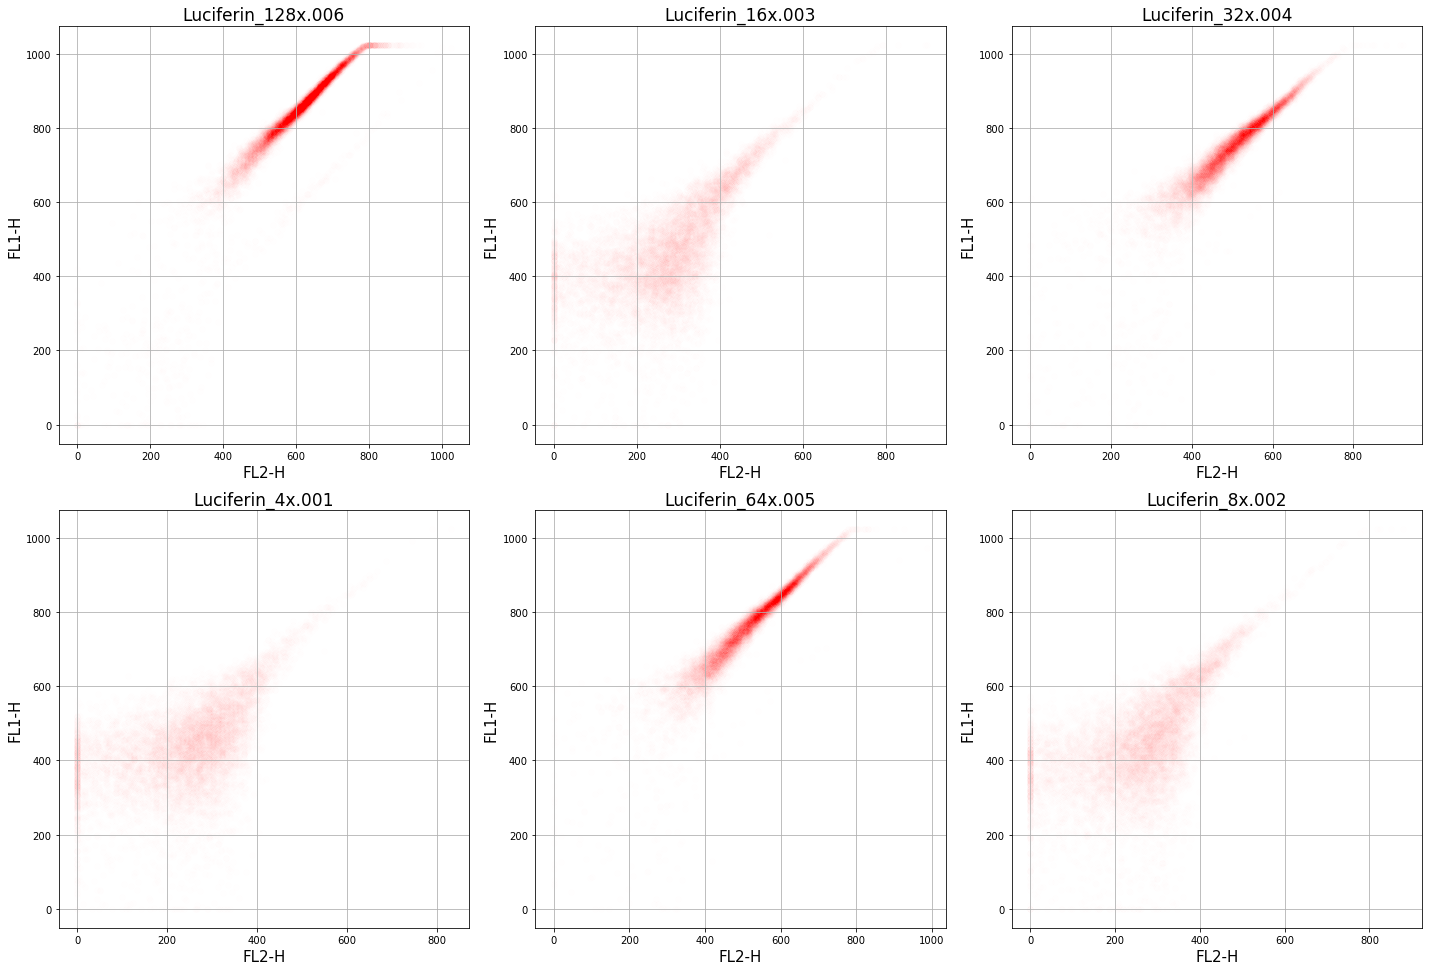

In [12]:
# Plotting scatter plots to see bacterial populations

fig = plt.figure(figsize = (50, 20))

plot_better(height=40, width=20)

x_channel = 'FL2-H'
y_channel = 'FL1-H'

for i, df_name in enumerate(DataFrames):
    x = DataFrames[df_name][x_channel].values
    y = DataFrames[df_name][y_channel].values
    ax = plt.subplot(len(DataFrames),3,i+1)
    ax.scatter(x, y, color='red', alpha=0.005)
    plt.xlabel(x_channel, fontsize=15)
    plt.ylabel(y_channel, fontsize=15)
    plt.title(df_name, fontsize=17)
    plt.grid()

plt.tight_layout()
# plt.savefig('FL1-H_vs_FL2-H.pdf')

In [8]:
#Removing the noise 

for df_name in DataFrames:
    DataFrames[df_name] = (DataFrames[df_name])[DataFrames[df_name]['FSC-H'] > 200]
    DataFrames[df_name] = (DataFrames[df_name])[DataFrames[df_name]['SSC-H'] > 430]

In [36]:
# Creating a new dataframe that stores the processed infromation about the composition of fluorescent cells 

labels = ['fluor cells', 'nonfluor cells', 'proportion of fluor cells', 'mean fluor intensity', 'fraction of fluor cells']

df_names = []
fluor_cells = []
nonfluor_cells = []
proportion_fluor = []
mean_intensity = []
frac_fluor = []

for df_name, df in DataFrames.items():
    df_names.append(df_name)
    fluor_counter = 0
    nonfluor_counter = 0
    for value in df['FL1-H'].values:
        if value >= 600:
            fluor_counter += 1
        else:
            nonfluor_counter += 1
    fluor_cells.append(fluor_counter)
    nonfluor_cells.append(nonfluor_counter)
    mean_intensity.append(np.mean(df['FL1-H'].values))
    if fluor_counter == 0:
        fluor_counter = 1
    elif nonfluor_counter == 0:
        nonfluor_counter = 1
    else: pass
    proportion_fluor.append(float(fluor_counter)/float(nonfluor_counter))
    frac_fluor.append(float(fluor_counter)/(float(fluor_counter)+float(nonfluor_counter)))
    
contents = [fluor_cells, nonfluor_cells, proportion_fluor, mean_intensity, frac_fluor] 
zipped = list(zip(labels, contents))

data = dict(zipped)
processed_data = pd.DataFrame(data)

for i in range(len(processed_data)):
    processed_data.rename(index = {i:df_names[i]}, inplace = True)
    
processed_data['luciferin_conc'] = processed_data.index.map(lambda s: int(s[:-4].split('_')[1][:-1]))
processed_data.sort_values('luciferin_conc', inplace=True)
processed_data.drop('luciferin_conc', inplace=True, axis=1)

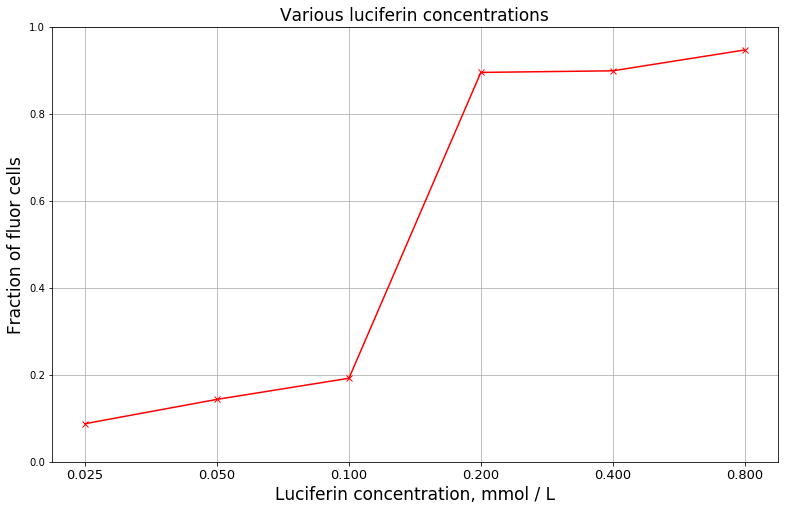

In [39]:
# Plotting graphs to compare green vs red lights
fig = plt.figure(figsize=(13, 8))

xticks = ['0.025', '0.050', '0.100', '0.200', '0.400', '0.800']
title = 'Various luciferin concentrations'
x = range(1, 7)

y = processed_data['fraction of fluor cells']
ax = plt.subplot(111)
ax.plot(x, y, c='r', marker='x')
plt.xticks(x, xticks, fontsize=13)
plt.xlabel(u'Luciferin concentration, mmol / L', fontsize=17)
plt.ylabel('Fraction of fluor cells', fontsize=17)
plt.ylim(0, 1)
plt.title(title, fontsize=17)
plt.grid()
# plt.savefig('Luciferin_concentrations_molar.pdf')